In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pandas_profiling as pp
from boruta import BorutaPy
from scipy import stats

In [2]:
from sklearn.model_selection import cross_val_score
from sklearn import metrics, preprocessing
from sklearn.model_selection import train_test_split, cross_validate
from sklearn.preprocessing import StandardScaler
from sklearn import linear_model
from   sklearn.metrics  import mean_squared_error,r2_score,accuracy_score

In [3]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
df=pd.read_csv('Agriculture.csv')

In [5]:
df = np.log(df.select_dtypes(include=['float64','int64'])+1).join(df.select_dtypes(include=['object']))

In [6]:
df.dropna(inplace=True)

In [7]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

In [8]:
df['Crop Name']= label_encoder.fit_transform(df['Crop Name'])
df['State Name']= label_encoder.fit_transform(df['State Name'])
df['Season']= label_encoder.fit_transform(df['Season'])
df['City Name']= label_encoder.fit_transform(df['City Name'])
df['Input Cost\n(High/Medium/Low)']= label_encoder.fit_transform(df['Input Cost\n(High/Medium/Low)'])
df['Market Price\n(High/Medium/Low)']= label_encoder.fit_transform(df['Market Price\n(High/Medium/Low)'])
df['Return\n(High/Moderate/Low)']= label_encoder.fit_transform(df['Return\n(High/Moderate/Low)'])

In [9]:
df.head()

,Crop_Year,Area,Production,Rain Fall,Production per Area,State Name,City Name,Season,Crop Name,Input Cost (High/Medium/Low),Market Price (High/Medium/Low),Return (High/Moderate/Low)
0,7.601402,7.134891,7.601402,6.405559,0.953547,0,427,1,2,2,1,0
1,7.601402,1.098612,0.693147,6.405559,0.405465,0,427,1,74,0,0,1
2,7.601402,4.634729,5.774552,6.405559,1.422399,0,427,1,95,1,1,0
3,7.601402,5.176150,6.464588,7.231721,1.535155,0,427,4,7,1,1,0
4,7.601402,6.580639,5.111988,7.231721,0.206336,0,427,4,22,0,0,1


In [10]:
from sklearn.model_selection import KFold


from sklearn import metrics
from sklearn.metrics import accuracy_score,f1_score,recall_score,precision_score, confusion_matrix

# Multiple Logistic Regression

In [11]:
X=df.drop(['Return\n(High/Moderate/Low)'],axis=1)
y=df['Return\n(High/Moderate/Low)']

In [12]:
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression()

In [13]:
from sklearn.feature_selection import RFE
rfe = RFE(LR)       
rfe = rfe.fit(X,y)
X.columns[rfe.support_]

Index(['Area', 'Production', 'Production\nper Area',
       'Input Cost\n(High/Medium/Low)', 'Market Price\n(High/Medium/Low)'],
      dtype='object')

In [14]:
X=df[['Area', 'Production', 'Production\nper Area','Input Cost\n(High/Medium/Low)', 'Market Price\n(High/Medium/Low)']]

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [16]:
LR.fit(X_train, y_train)

LR_pred_test=LR.predict(X_test)
LR_pred_train=LR.predict(X_train)

LR_accuracy_test=LR.score(X_test,y_test)
LR_accuracy_train=LR.score(X_train,y_train)

LR_cv_results = cross_validate(LR, X, y, cv=3,scoring=['accuracy','f1_micro','f1_macro'])
LR_CV_accuracy_test=LR_cv_results['test_accuracy'].mean()
LR_CV_accuracy_train=LR_cv_results['train_accuracy'].mean()

LR_CV_f1_micro_test=LR_cv_results['test_f1_micro'].mean()
LR_CV_f1_micro_train=LR_cv_results['train_f1_micro'].mean()

LR_CV_f1_macro_test=LR_cv_results['test_f1_macro'].mean()
LR_CV_f1_macro_train=LR_cv_results['train_f1_macro'].mean()

print('LR accuracy train  :',LR_accuracy_train)
print('LR accuracy test  :',LR_accuracy_test)

print('LR CV accuracy train :',LR_CV_accuracy_train)
print('LR CV accuracy test  :',LR_CV_accuracy_test)

# f1 score

LR_f1_micro_test=f1_score(y_test, LR_pred_test, average='micro')  
LR_f1_micro_train=f1_score(y_test, LR_pred_test, average='micro') 

LR_f1_macro_test=f1_score(y_test, LR_pred_test, average='macro')  
LR_f1_macro_train=f1_score(y_test, LR_pred_test, average='macro') 

print('---------f1----------')
print('LR f1 micro test  :',LR_f1_micro_test)
print('LR f1 micro train  :',LR_f1_micro_train)

print('LR CV f1 micro test :',LR_CV_f1_micro_test)
print('LR CV f1 micro train :',LR_CV_f1_micro_train)
print()

print('LR f1 macro test  :',LR_f1_macro_test)
print('LR f1 macro train  :',LR_f1_macro_train)

print('LR CV f1 macro test :',LR_CV_f1_macro_test)
print('LR CV f1 macro train :',LR_CV_f1_macro_train)

LR accuracy train  : 0.8985948665462326
LR accuracy test  : 0.8988433517762812
LR CV accuracy train : 0.8984722791347117
LR CV accuracy test  : 0.8971480261434092
---------f1----------
LR f1 micro test  : 0.8988433517762812
LR f1 micro train  : 0.8988433517762812
LR CV f1 micro test : 0.8971480261434092
LR CV f1 micro train : 0.8984722791347117

LR f1 macro test  : 0.8901669328630688
LR f1 macro train  : 0.8901669328630688
LR CV f1 macro test : 0.888389326012116
LR CV f1 macro train : 0.8893251229949475


# SVM

In [17]:
X=df.drop(['Return\n(High/Moderate/Low)'],axis=1)
y=df['Return\n(High/Moderate/Low)']

In [18]:
from sklearn.linear_model import SGDClassifier
SVM = SGDClassifier()

In [19]:
from sklearn.feature_selection import RFE
rfe = RFE(SVM)          
rfe = rfe.fit(X,y)
X.columns[rfe.support_]

Index(['Area', 'Production', 'Production\nper Area',
       'Input Cost\n(High/Medium/Low)', 'Market Price\n(High/Medium/Low)'],
      dtype='object')

In [20]:
X=df[['Area', 'Production', 'Production\nper Area','Input Cost\n(High/Medium/Low)', 'Market Price\n(High/Medium/Low)']]

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [22]:
SVM.fit(X_train, y_train)

SVM_pred_test=SVM.predict(X_test)
SVM_pred_train=SVM.predict(X_train)

SVM_accuracy_test=SVM.score(X_test,y_test)
SVM_accuracy_train=SVM.score(X_train,y_train)

SVM_cv_results = cross_validate(SVM, X, y, cv=3,scoring=['accuracy','f1_micro','f1_macro'])
SVM_CV_accuracy_test=SVM_cv_results['test_accuracy'].mean()
SVM_CV_accuracy_train=SVM_cv_results['train_accuracy'].mean()

SVM_CV_f1_micro_test=SVM_cv_results['test_f1_micro'].mean()
SVM_CV_f1_micro_train=SVM_cv_results['train_f1_micro'].mean()

SVM_CV_f1_macro_test=SVM_cv_results['test_f1_macro'].mean()
SVM_CV_f1_macro_train=SVM_cv_results['train_f1_macro'].mean()

print('SVM accuracy train  :',SVM_accuracy_train)
print('SVM accuracy test  :',SVM_accuracy_test)

print('SVM CV accuracy train :',SVM_CV_accuracy_train)
print('SVM CV accuracy test  :',SVM_CV_accuracy_test)

# f1 score

SVM_f1_micro_test=f1_score(y_test, SVM_pred_test, average='micro')  
SVM_f1_micro_train=f1_score(y_test, SVM_pred_test, average='micro') 

SVM_f1_macro_test=f1_score(y_test, SVM_pred_test, average='macro')  
SVM_f1_macro_train=f1_score(y_test, SVM_pred_test, average='macro') 



print('---------f1----------')
print('SVM f1 micro test  :',SVM_f1_micro_test)
print('SVM f1 micro train  :',SVM_f1_micro_train)

print('SVM CV f1 micro test :',SVM_CV_f1_micro_test)
print('SVM CV f1 micro train :',SVM_CV_f1_micro_train)
print()

print('SVM f1 macro test  :',SVM_f1_macro_test)
print('SVM f1 macro train  :',SVM_f1_macro_train)

print('SVM CV f1 macro test :',SVM_CV_f1_macro_test)
print('SVM CV f1 macro train :',SVM_CV_f1_macro_train)

SVM accuracy train  : 0.9005863457281846
SVM accuracy test  : 0.9009087950329219
SVM CV accuracy train : 0.8854041611970409
SVM CV accuracy test  : 0.8660172841865718
---------f1----------
SVM f1 micro test  : 0.900908795032922
SVM f1 micro train  : 0.900908795032922
SVM CV f1 micro test : 0.8660172841865718
SVM CV f1 micro train : 0.8854041611970409

SVM f1 macro test  : 0.8926288807372461
SVM f1 macro train  : 0.8926288807372461
SVM CV f1 macro test : 0.8514032560253165
SVM CV f1 macro train : 0.870218859357975


# KNN

In [23]:
X=df.drop(['Return\n(High/Moderate/Low)'],axis=1)
y=df['Return\n(High/Moderate/Low)']

In [24]:
from sklearn.neighbors import KNeighborsClassifier
KNN = KNeighborsClassifier()

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [26]:
KNN = KNeighborsClassifier(metric= 'minkowski', n_neighbors= 5)
KNN.fit(X,y)
KNN_pred_test=KNN.predict(X_test)
KNN_pred_train=KNN.predict(X_train)

KNN_accuracy_test=KNN.score(X_test,y_test)
KNN_accuracy_train=KNN.score(X_train,y_train)

KNN_cv_results = cross_validate(KNN, X, y, cv=3,scoring=['accuracy','f1_micro','f1_macro'])
KNN_CV_accuracy_test=KNN_cv_results['test_accuracy'].mean()
KNN_CV_accuracy_train=KNN_cv_results['train_accuracy'].mean()

KNN_CV_f1_micro_test=KNN_cv_results['test_f1_micro'].mean()
KNN_CV_f1_micro_train=KNN_cv_results['train_f1_micro'].mean()

KNN_CV_f1_macro_test=KNN_cv_results['test_f1_macro'].mean()
KNN_CV_f1_macro_train=KNN_cv_results['train_f1_macro'].mean()

print('KNN accuracy train  :',KNN_accuracy_train)
print('KNN accuracy test  :',KNN_accuracy_test)

print('KNN CV accuracy train :',KNN_CV_accuracy_train)
print('KNN CV accuracy test  :',KNN_CV_accuracy_test)


# f1 score

KNN_f1_micro_test=f1_score(y_test, KNN_pred_test, average='micro')  
KNN_f1_micro_train=f1_score(y_test, KNN_pred_test, average='micro') 

KNN_f1_macro_test=f1_score(y_test, KNN_pred_test, average='macro')  
KNN_f1_macro_train=f1_score(y_test, KNN_pred_test, average='macro') 

print('---------f1----------')
print('KNN f1 micro test  :',KNN_f1_micro_test)
print('KNN f1 micro train  :',KNN_f1_micro_train)

print('KNN CV f1 micro test :',KNN_CV_f1_micro_test)
print('KNN CV f1 micro train :',KNN_CV_f1_micro_train)
print()

print('KNN f1 macro test  :',KNN_f1_macro_test)
print('KNN f1 macro train  :',KNN_f1_macro_train)

print('KNN CV f1 macro test :',KNN_CV_f1_macro_test)
print('KNN CV f1 macro train :',KNN_CV_f1_macro_train)

KNN accuracy train  : 0.9464273603344205
KNN accuracy test  : 0.946498760734046
KNN CV accuracy train : 0.9471841360645286
KNN CV accuracy test  : 0.6071456689886899
---------f1----------
KNN f1 micro test  : 0.946498760734046
KNN f1 micro train  : 0.946498760734046
KNN CV f1 micro test : 0.6071456689886899
KNN CV f1 micro train : 0.9471841360645286

KNN f1 macro test  : 0.9416786509466802
KNN f1 macro train  : 0.9416786509466802
KNN CV f1 macro test : 0.5617564324927545
KNN CV f1 macro train : 0.9423329746025352


# Naive Bayes

In [27]:
X=df.drop(['Return\n(High/Moderate/Low)'],axis=1)
y=df['Return\n(High/Moderate/Low)']

In [28]:
from sklearn.naive_bayes import BernoulliNB
NB = BernoulliNB()

In [29]:
from sklearn.feature_selection import RFE
rfe = RFE(NB)             # running RFE with 13 variables as output
rfe = rfe.fit(X,y)
X.columns[rfe.support_]

Index(['Production', 'Production\nper Area', 'Season',
       'Input Cost\n(High/Medium/Low)', 'Market Price\n(High/Medium/Low)'],
      dtype='object')

In [30]:
X=df[['Production', 'Production\nper Area', 'Season','Input Cost\n(High/Medium/Low)', 'Market Price\n(High/Medium/Low)']]

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [32]:
NB.fit(X_train, y_train)

BernoulliNB(alpha=1.0, binarize=0.0, class_prior=None, fit_prior=True)

In [33]:
NB.fit(X_train, y_train)

NB_pred_test=NB.predict(X_test)
NB_pred_train=NB.predict(X_train)

NB_accuracy_test=NB.score(X_test,y_test)
NB_accuracy_train=NB.score(X_train,y_train)

NB_cv_results = cross_validate(NB, X, y, cv=3, scoring=['accuracy','f1_micro','f1_macro'])
NB_CV_accuracy_test=NB_cv_results['test_accuracy'].mean()
NB_CV_accuracy_train=NB_cv_results['train_accuracy'].mean()

NB_CV_f1_micro_test=NB_cv_results['test_f1_micro'].mean()
NB_CV_f1_micro_train=NB_cv_results['train_f1_micro'].mean()

NB_CV_f1_macro_test=NB_cv_results['test_f1_macro'].mean()
NB_CV_f1_macro_train=NB_cv_results['train_f1_macro'].mean()


print('NB accuracy train  :',NB_accuracy_train)
print('NB accuracy test  :',NB_accuracy_test)

print('NB CV accuracy train :',NB_CV_accuracy_train)
print('NB CV accuracy test  :',NB_CV_accuracy_test)

# f1 score

NB_f1_micro_test=f1_score(y_test, NB_pred_test, average='micro')  
NB_f1_micro_train=f1_score(y_test, NB_pred_test, average='micro') 

NB_f1_macro_test=f1_score(y_test, NB_pred_test, average='macro')  
NB_f1_macro_train=f1_score(y_test, NB_pred_test, average='macro') 

print('---------f1----------')
print('NB f1 micro test  :',NB_f1_micro_test)
print('NB f1 micro train  :',NB_f1_micro_train)

print('NB CV f1 micro test :',NB_CV_f1_micro_test)
print('NB CV f1 micro train :',NB_CV_f1_micro_train)
print()

print('NB f1 macro test  :',NB_f1_macro_test)
print('NB f1 macro train  :',NB_f1_macro_train)

print('NB CV f1 macro test :',NB_CV_f1_macro_test)
print('NB CV f1 macro train :',NB_CV_f1_macro_train)

NB accuracy train  : 0.5675592357159152
NB accuracy test  : 0.5678967528728438
NB CV accuracy train : 0.5664788502550909
NB CV accuracy test  : 0.5643121684043592
---------f1----------
NB f1 micro test  : 0.5678967528728438
NB f1 micro train  : 0.5678967528728438
NB CV f1 micro test : 0.5643121684043592
NB CV f1 micro train : 0.5664788502550909

NB f1 macro test  : 0.5634695925900579
NB f1 macro train  : 0.5634695925900579
NB CV f1 macro test : 0.5592125278256691
NB CV f1 macro train : 0.5615228906070301


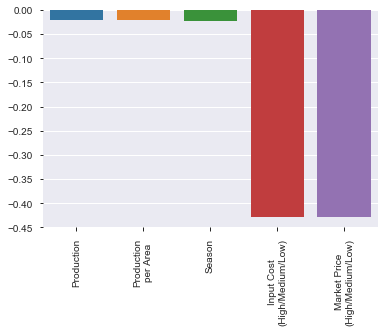

In [34]:
plt.xticks(rotation='vertical')
sns.barplot(X.columns,NB.coef_[0])

# Decision Tree

In [35]:
X=df.drop(['Return\n(High/Moderate/Low)'],axis=1)
y=df['Return\n(High/Moderate/Low)']

In [36]:
from sklearn.tree import DecisionTreeClassifier
DT=DecisionTreeClassifier()

In [37]:
from sklearn.feature_selection import RFE
rfe = RFE(DT)             # running RFE with 13 variables as output
rfe = rfe.fit(X,y)
X.columns[rfe.support_]

Index(['Area', 'Rain Fall', 'Production\nper Area', 'State Name', 'Crop Name'], dtype='object')

In [38]:
X=df[['Area', 'Rain Fall', 'Production\nper Area', 'State Name', 'Crop Name']]

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [40]:
DT=DecisionTreeClassifier(max_depth= 2, max_features= 3, min_samples_leaf= 100, min_samples_split= 220)

DT.fit(X_train, y_train)
DT_pred_test=DT.predict(X_test)
DT_pred_train=DT.predict(X_train)

DT_accuracy_test=DT.score(X_test,y_test)
DT_accuracy_train=DT.score(X_train,y_train)

DT_cv_results = cross_validate(DT, X, y, cv=3, scoring=['accuracy','f1_micro','f1_macro'])
DT_CV_accuracy_test=DT_cv_results['test_accuracy'].mean()
DT_CV_accuracy_train=DT_cv_results['train_accuracy'].mean()

DT_CV_f1_micro_test=DT_cv_results['test_f1_micro'].mean()
DT_CV_f1_micro_train=DT_cv_results['train_f1_micro'].mean()

DT_CV_f1_macro_test=DT_cv_results['test_f1_macro'].mean()
DT_CV_f1_macro_train=DT_cv_results['train_f1_macro'].mean()

print('DT accuracy train :',DT_accuracy_train)
print('DT accuracy test  :',DT_accuracy_test)

print('DT CV accuracy train :',DT_CV_accuracy_train)
print('DT CV accuracy test  :',DT_CV_accuracy_test)

# f1 score

DT_f1_micro_test=f1_score(y_test, DT_pred_test, average='micro')  
DT_f1_micro_train=f1_score(y_test, DT_pred_test, average='micro') 

DT_f1_macro_test=f1_score(y_test, DT_pred_test, average='macro')  
DT_f1_macro_train=f1_score(y_test, DT_pred_test, average='macro') 


print('---------f1----------')
print('DT f1 micro test  :',DT_f1_micro_test)
print('DT f1 micro train  :',DT_f1_micro_train)

print('DT CV f1 micro test :',DT_CV_f1_micro_test)
print('DT CV f1 micro train :',DT_CV_f1_micro_train)
print()

print('DT f1 macro test  :',DT_f1_macro_test)
print('DT f1 macro train  :',DT_f1_macro_train)

print('DT CV f1 macro test :',DT_CV_f1_macro_test)
print('DT CV f1 macro train :',DT_CV_f1_macro_train)

DT accuracy train : 0.6545369348484195
DT accuracy test  : 0.6526800690984653
DT CV accuracy train : 0.9026197269623376
DT CV accuracy test  : 0.8991019491100468
---------f1----------
DT f1 micro test  : 0.6526800690984653
DT f1 micro train  : 0.6526800690984653
DT CV f1 micro test : 0.8991019491100468
DT CV f1 micro train : 0.9026197269623375

DT f1 macro test  : 0.49966630379203636
DT f1 macro train  : 0.49966630379203636
DT CV f1 macro test : 0.8905326478495791
DT CV f1 macro train : 0.8954820480465421


# DT Grid Search

In [41]:
param_grid={
    'max_depth':range(2,10),
    'min_samples_leaf':range(100,400,200),
    'min_samples_split':range(20,500,200),
    'max_features':range(1,5)
}
DT_GS=GridSearchCV(estimator=DT,param_grid=param_grid,cv=3,n_jobs=-1,verbose=1)
DT_GS.fit(X,y).best_params_

Fitting 3 folds for each of 192 candidates, totalling 576 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    5.9s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:   15.9s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:   37.8s
[Parallel(n_jobs=-1)]: Done 576 out of 576 | elapsed:   51.6s finished


{'max_depth': 2,
 'max_features': 3,
 'min_samples_leaf': 100,
 'min_samples_split': 220}

In [42]:
DT=DecisionTreeClassifier(max_depth= 2, max_features= 3, min_samples_leaf= 100, min_samples_split= 220)

DT.fit(X_train, y_train)
DT_pred_test=DT.predict(X_test)
DT_pred_train=DT.predict(X_train)

DT_accuracy_test=DT.score(X_test,y_test)
DT_accuracy_train=DT.score(X_train,y_train)

DT_cv_results = cross_validate(DT, X, y, cv=3, scoring=['accuracy','f1_micro','f1_macro'])
DT_CV_accuracy_test=DT_cv_results['test_accuracy'].mean()
DT_CV_accuracy_train=DT_cv_results['train_accuracy'].mean()
DT_CV_f1_micro_test=DT_cv_results['train_f1_micro'].mean()
DT_CV_f1_micro_train=DT_cv_results['train_f1_micro'].mean()
DT_CV_f1_macro_test=DT_cv_results['test_f1_macro'].mean()
DT_CV_f1_macro_train=DT_cv_results['train_f1_macro'].mean()

print('DT accuracy train :',DT_accuracy_train)
print('DT accuracy test  :',DT_accuracy_test)

print('DT CV accuracy train :',DT_CV_accuracy_train)
print('DT CV accuracy test  :',DT_CV_accuracy_test)

# f1 score

DT_f1_micro_test=f1_score(y_test, DT_pred_test, average='micro')  
DT_f1_micro_train=f1_score(y_test, DT_pred_test, average='micro') 

DT_f1_macro_test=f1_score(y_test, DT_pred_test, average='macro')  
DT_f1_macro_train=f1_score(y_test, DT_pred_test, average='macro') 


print('---------f1----------')
print('DT f1 micro test  :',DT_f1_micro_test)
print('DT f1 micro train  :',DT_f1_micro_train)

print('DT CV f1 micro test :',DT_CV_f1_micro_test)
print('DT CV f1 micro train :',DT_CV_f1_micro_train)
print()

print('DT f1 macro test  :',DT_f1_macro_test)
print('DT f1 macro train  :',DT_f1_macro_train)

print('DT CV f1 macro test :',DT_CV_f1_macro_test)
print('DT CV f1 macro train :',DT_CV_f1_macro_train)

DT accuracy train : 0.9037986078142437
DT accuracy test  : 0.9043512004606564
DT CV accuracy train : 0.9028551887462705
DT CV accuracy test  : 0.8987756053171884
---------f1----------
DT f1 micro test  : 0.9043512004606564
DT f1 micro train  : 0.9043512004606564
DT CV f1 micro test : 0.9028551887462704
DT CV f1 micro train : 0.9028551887462704

DT f1 macro test  : 0.8961994657960157
DT f1 macro train  : 0.8961994657960157
DT CV f1 macro test : 0.8901778406302602
DT CV f1 macro train : 0.8954359023579808


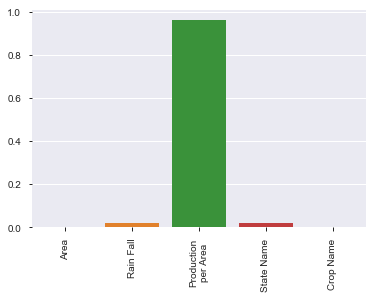

In [43]:
plt.xticks(rotation='vertical')
sns.barplot(X.columns,DT.feature_importances_)

# BEST CLASSIFICATION MODEL

In [44]:
best_model_cv=pd.DataFrame({'train_acc':[LR_accuracy_train,SVM_accuracy_train,KNN_accuracy_train,NB_accuracy_train,DT_accuracy_train],
                        'test_acc':[LR_accuracy_test,SVM_accuracy_test,KNN_accuracy_test,NB_accuracy_test,DT_accuracy_test],
                           'CV_train':[LR_CV_accuracy_train,SVM_CV_accuracy_train,KNN_CV_accuracy_train,NB_CV_accuracy_train,DT_CV_accuracy_train],
                           'CV_test':[LR_CV_accuracy_test,SVM_CV_accuracy_test,KNN_CV_accuracy_test,NB_CV_accuracy_test,DT_CV_accuracy_test]},
                        index=['LR','SVM','KNN','NB','DT'])

'train_f1_macro':[LR_f1_macro_train,SVM_f1_macro_train,KNN_f1_macro_train,NB_f1_macro_train,DT_f1_macro_train],
                           'test_f1_macro':[LR_f1_macro_test,SVM_f1_macro_test,KNN_f1_macro_test,NB_f1_macro_test,DT_f1_macro_test],
                           'CV_train_macro':[LR_CV_f1_macro_train,SVM_CV_f1_macro_train,KNN_CV_f1_macro_train,NB_CV_f1_macro_train,DT_CV_f1_macro_train],
                           'CV_test_macro':[LR_CV_f1_macro_test,SVM_CV_f1_macro_test,KNN_CV_f1_macro_test,NB_CV_f1_macro_test,DT_CV_f1_macro_test]

In [49]:
best_model_cv=pd.DataFrame({'train_acc':[LR_accuracy_train,SVM_accuracy_train,KNN_accuracy_train,NB_accuracy_train,DT_accuracy_train],
                        'test_acc':[LR_accuracy_test,SVM_accuracy_test,KNN_accuracy_test,NB_accuracy_test,DT_accuracy_test],
                           'CV_accuracy_train':[LR_CV_accuracy_train,SVM_CV_accuracy_train,KNN_CV_accuracy_train,NB_CV_accuracy_train,DT_CV_accuracy_train],
                           'CV_accuracy_test':[LR_CV_accuracy_test,SVM_CV_accuracy_test,KNN_CV_accuracy_test,NB_CV_accuracy_test,DT_CV_accuracy_test],
                           'train_f1_micro':[LR_f1_micro_train,SVM_f1_micro_train,KNN_f1_micro_train,NB_f1_micro_train,DT_f1_micro_train],
                           'test_f1_micro':[LR_f1_micro_test,SVM_f1_micro_test,KNN_f1_micro_test,NB_f1_micro_test,DT_f1_micro_test],
                           'CV_train_micro':[LR_CV_f1_micro_train,SVM_CV_f1_micro_train,KNN_CV_f1_micro_train,NB_CV_f1_micro_train,DT_CV_f1_micro_train],
                           'CV_test_micro':[LR_CV_f1_micro_test,SVM_CV_f1_micro_test,KNN_CV_f1_micro_test,NB_CV_f1_micro_test,DT_CV_f1_micro_test]
                           },
                        index=['LR','SVM','KNN','NB','DT'])

In [50]:
best_model_cv

,train_acc,test_acc,CV_accuracy_train,CV_accuracy_test,train_f1_micro,test_f1_micro,CV_train_micro,CV_test_micro
LR,0.898595,0.898843,0.898472,0.897148,0.898843,0.898843,0.898472,0.897148
SVM,0.900586,0.900909,0.885404,0.866017,0.900909,0.900909,0.885404,0.866017
KNN,0.946427,0.946499,0.947184,0.607146,0.946499,0.946499,0.947184,0.607146
NB,0.567559,0.567897,0.566479,0.564312,0.567897,0.567897,0.566479,0.564312
DT,0.903799,0.904351,0.902855,0.898776,0.904351,0.904351,0.902855,0.902855


<Figure size 720x504 with 0 Axes>

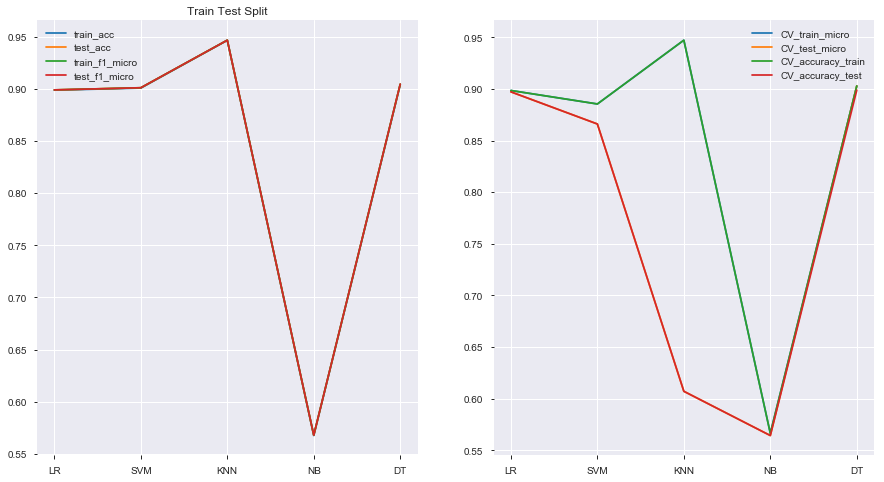

In [47]:
plt.figure(figsize=(10,7))
f,ax=plt.subplots(1,2,figsize=(15,8))
ax[0].set_title('Train Test Split')
ax[0].plot(best_model_cv['train_acc'])
ax[0].plot(best_model_cv['test_acc'])
ax[0].plot(best_model_cv['train_f1_micro'])
ax[0].plot(best_model_cv['test_f1_micro'])
ax[0].legend()

ax[0].set_title('Train Test Split')
ax[1].plot(best_model_cv['CV_train_micro'])
ax[1].plot(best_model_cv['CV_test_micro'])
ax[1].plot(best_model_cv['CV_accuracy_train'])
ax[1].plot(best_model_cv['CV_accuracy_test'])
plt.legend()
plt.show()